# 🧬 Breast Cancer Prediction using Machine Learning  
### 🩷 Early Detection Empowers Lives  

---

## 📖 Overview  
Breast cancer is one of the most common cancers among women worldwide.  
This project leverages **Machine Learning** to predict whether a breast tumor is **malignant (cancerous)** or **benign (non-cancerous)** using the **Breast Cancer dataset**.  

We perform:
- Data cleaning and feature analysis  
- Visualization for insight discovery  
- Model training with Logistic Regression
- Saving the model for real-world deployment  

---

### 🎯 Objectives
- 🔹 Understand data distribution and relationships  
- 🔹 Preprocess and scale features  
- 🔹 Train a high-performing ML model  
- 🔹 Build a reusable prediction pipeline  

---

### 🧰 Tech Stack
| Technology | Purpose |
|-------------|----------|
| 🐍 Python | Programming Language |
| 🧮 Pandas, NumPy | Data Handling |
| 📊 Matplotlib, Seaborn | Data Visualization |
| 🤖 Scikit-learn | Model Building |
| 💾 Joblib | Model Saving |


### ⚙️Import Libraries

In [31]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import time

# Misc
import warnings
warnings.filterwarnings('ignore')

# Visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.titlesize'] = 14

print("✅ Libraries Imported Successfully!")


✅ Libraries Imported Successfully!


## 📥Load and Inspect the Dataset

In [32]:
# Load dataset
df = pd.read_csv("Cancer_data.csv")

# Display first few records
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
# Basic info
df.info()

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [34]:
# Check for nulls
print("🔍 Missing Values in Each Column:")
print(df.isnull().sum())


🔍 Missing Values in Each Column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fracta

## 🧹Data Cleaning & Preprocessing

Number of Begins:  357
Number of Malignant:  212


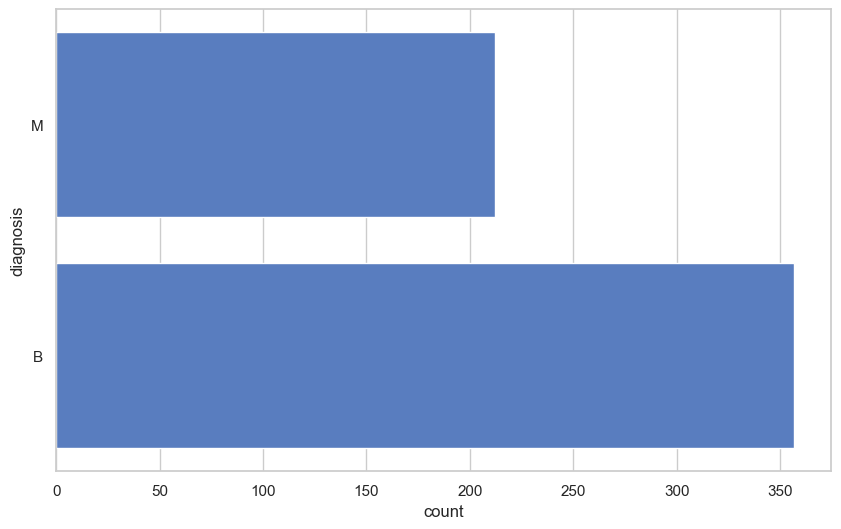

In [35]:
y = df.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = df.drop(list,axis = 1 )
x.head()

# Check dataset balance
ax = sns.countplot(y, label = "Count")
B, M = y.value_counts()
print("Number of Begins: ",B)
print("Number of Malignant: ",M)

## 📊Exploratory Data Analysis (EDA)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

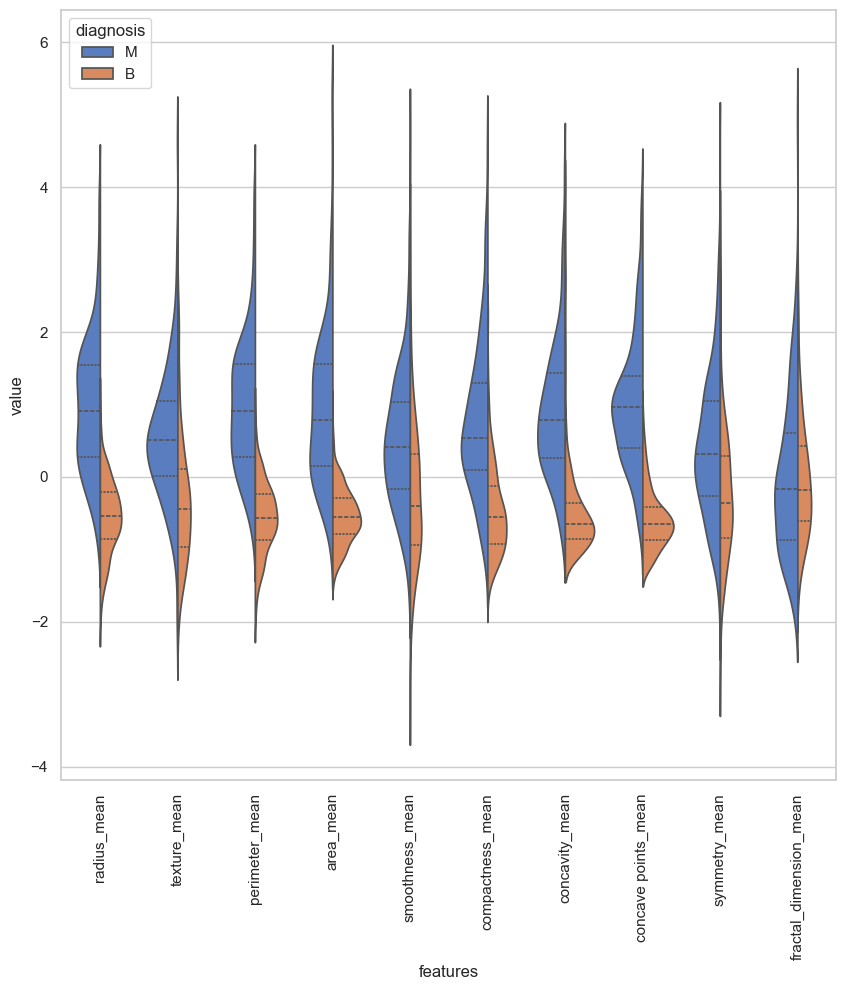

In [36]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

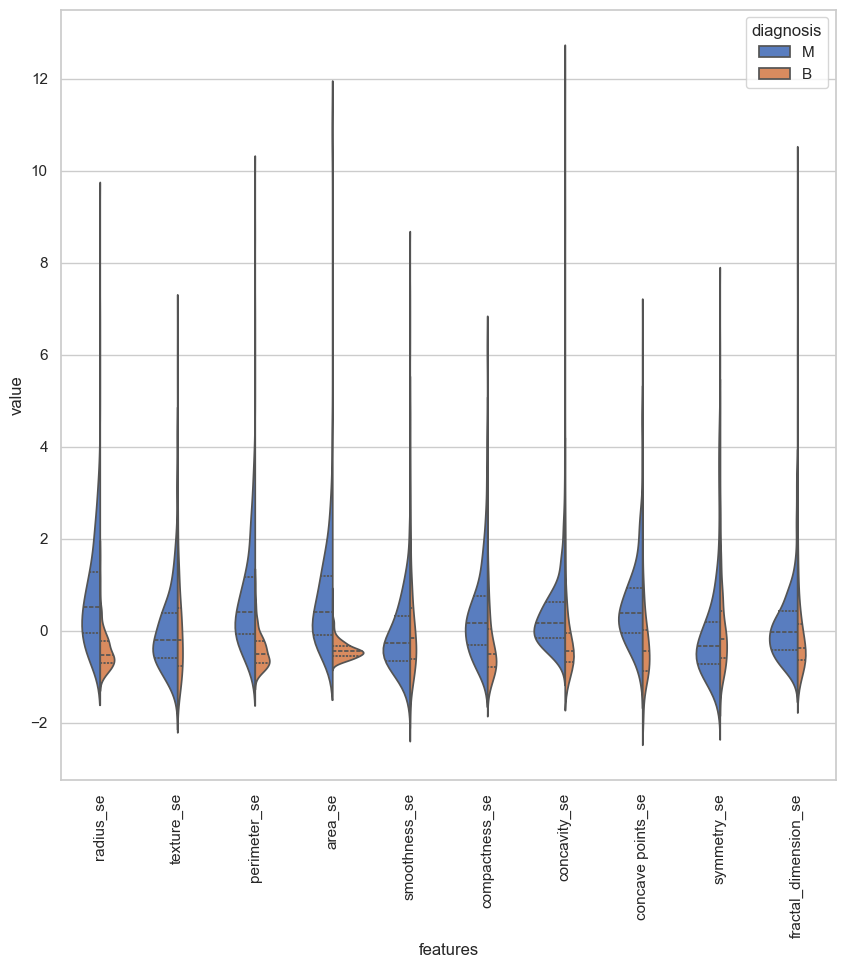

In [37]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

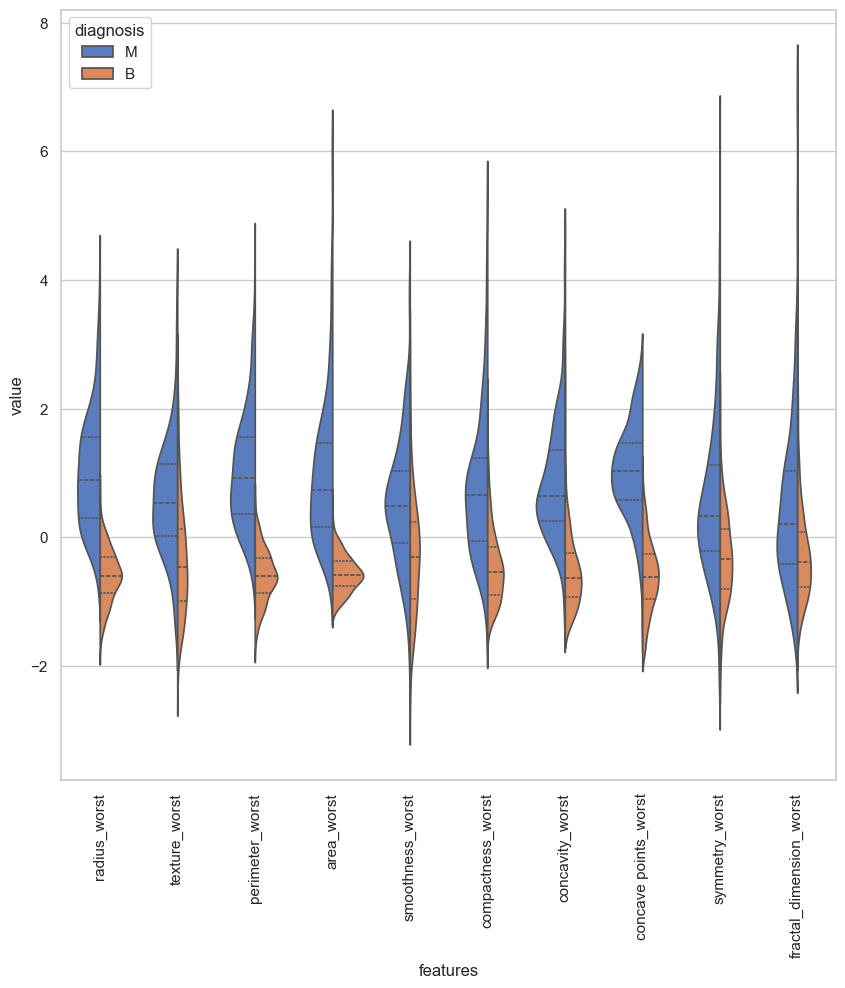

In [38]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

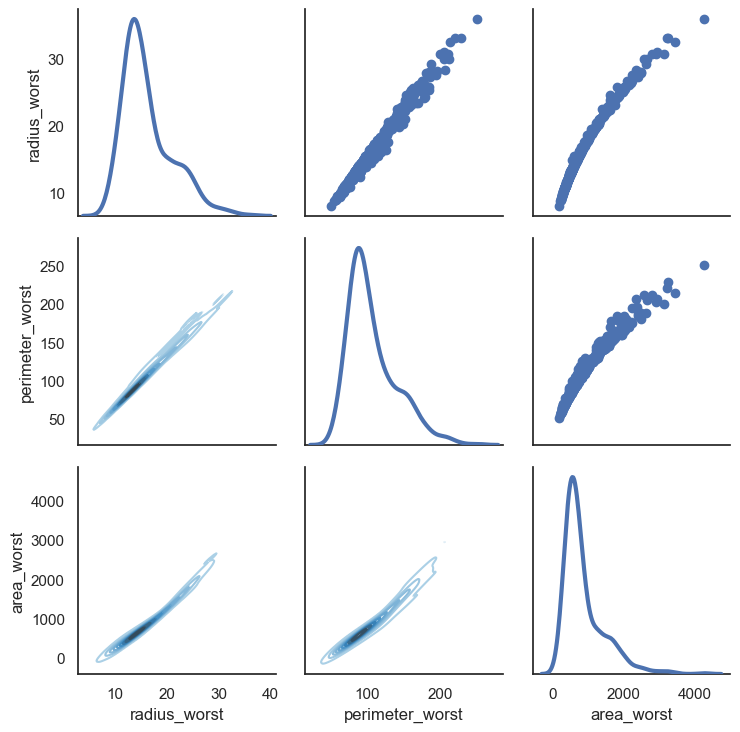

In [39]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

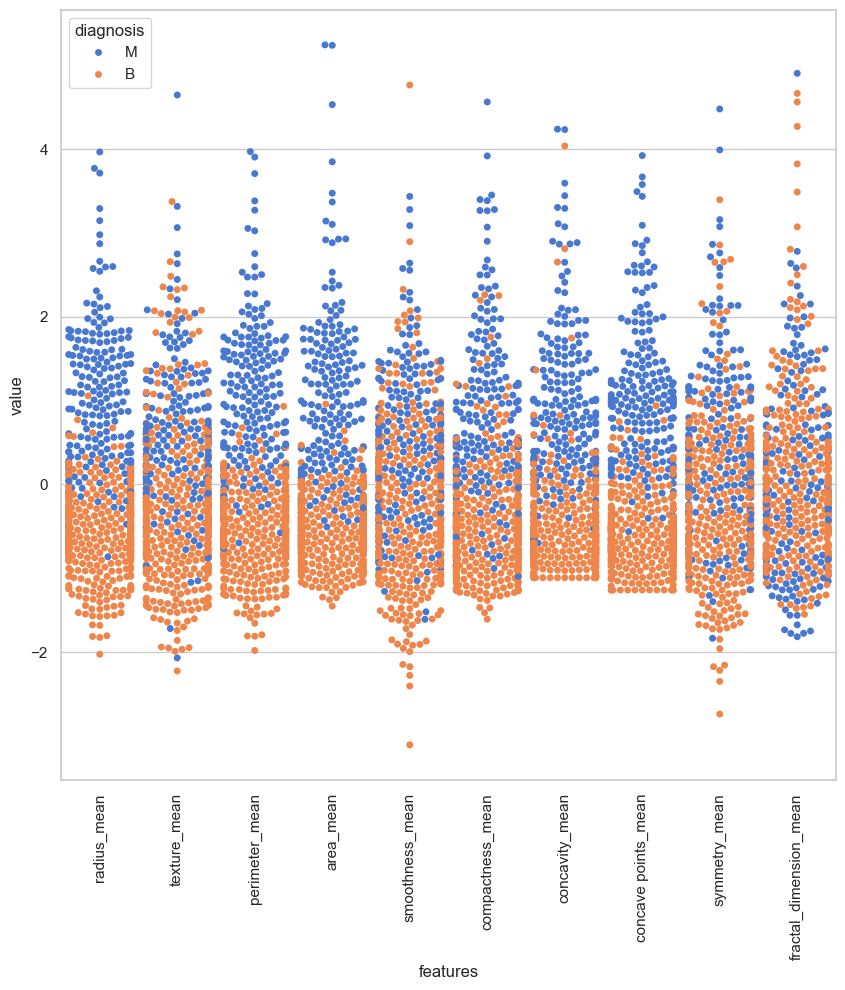

In [40]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

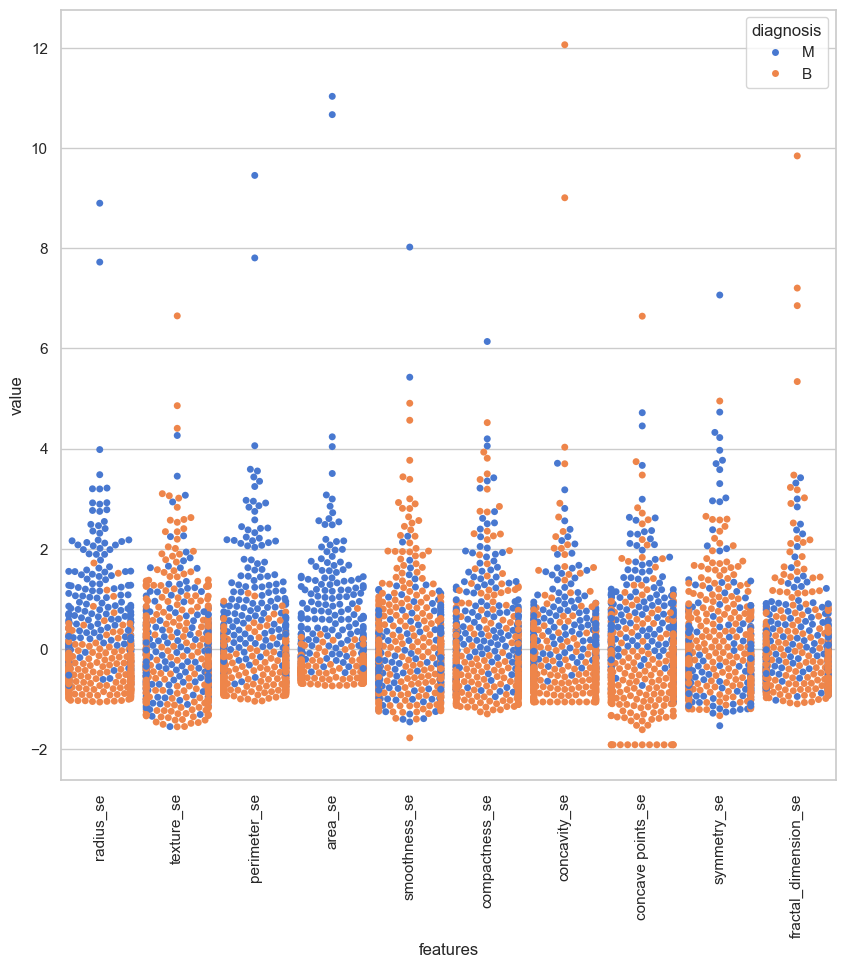

In [41]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  46.59575128555298  s


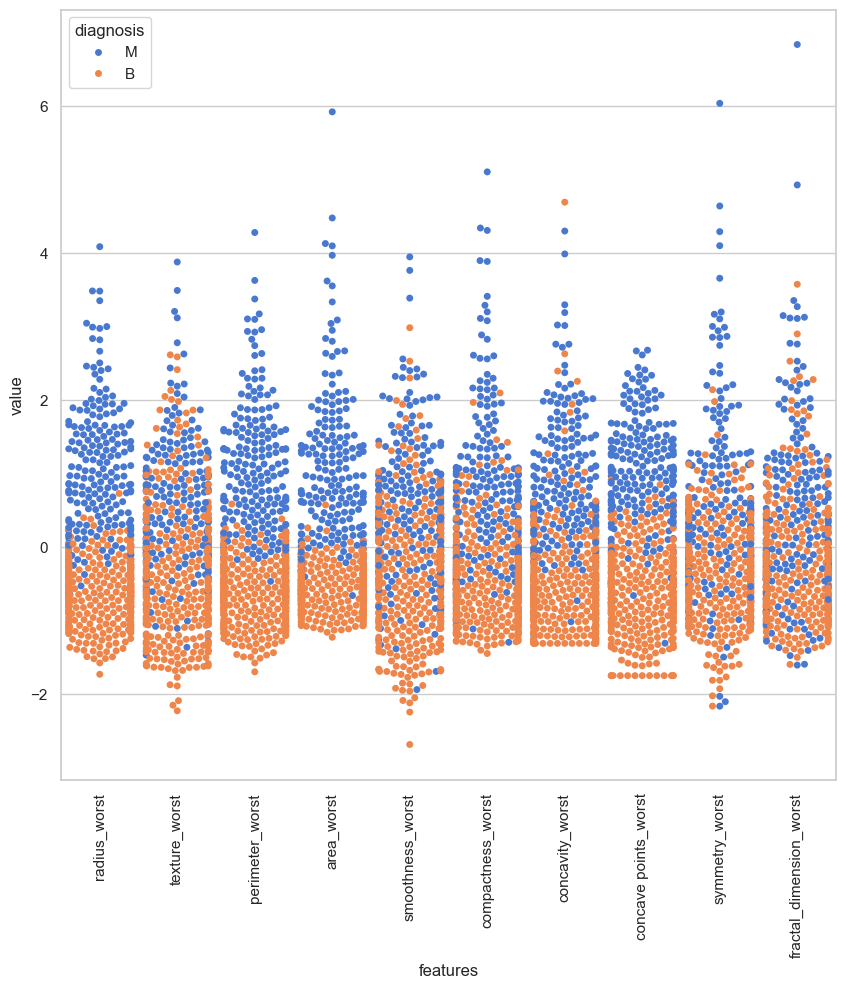

In [42]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

<Axes: >

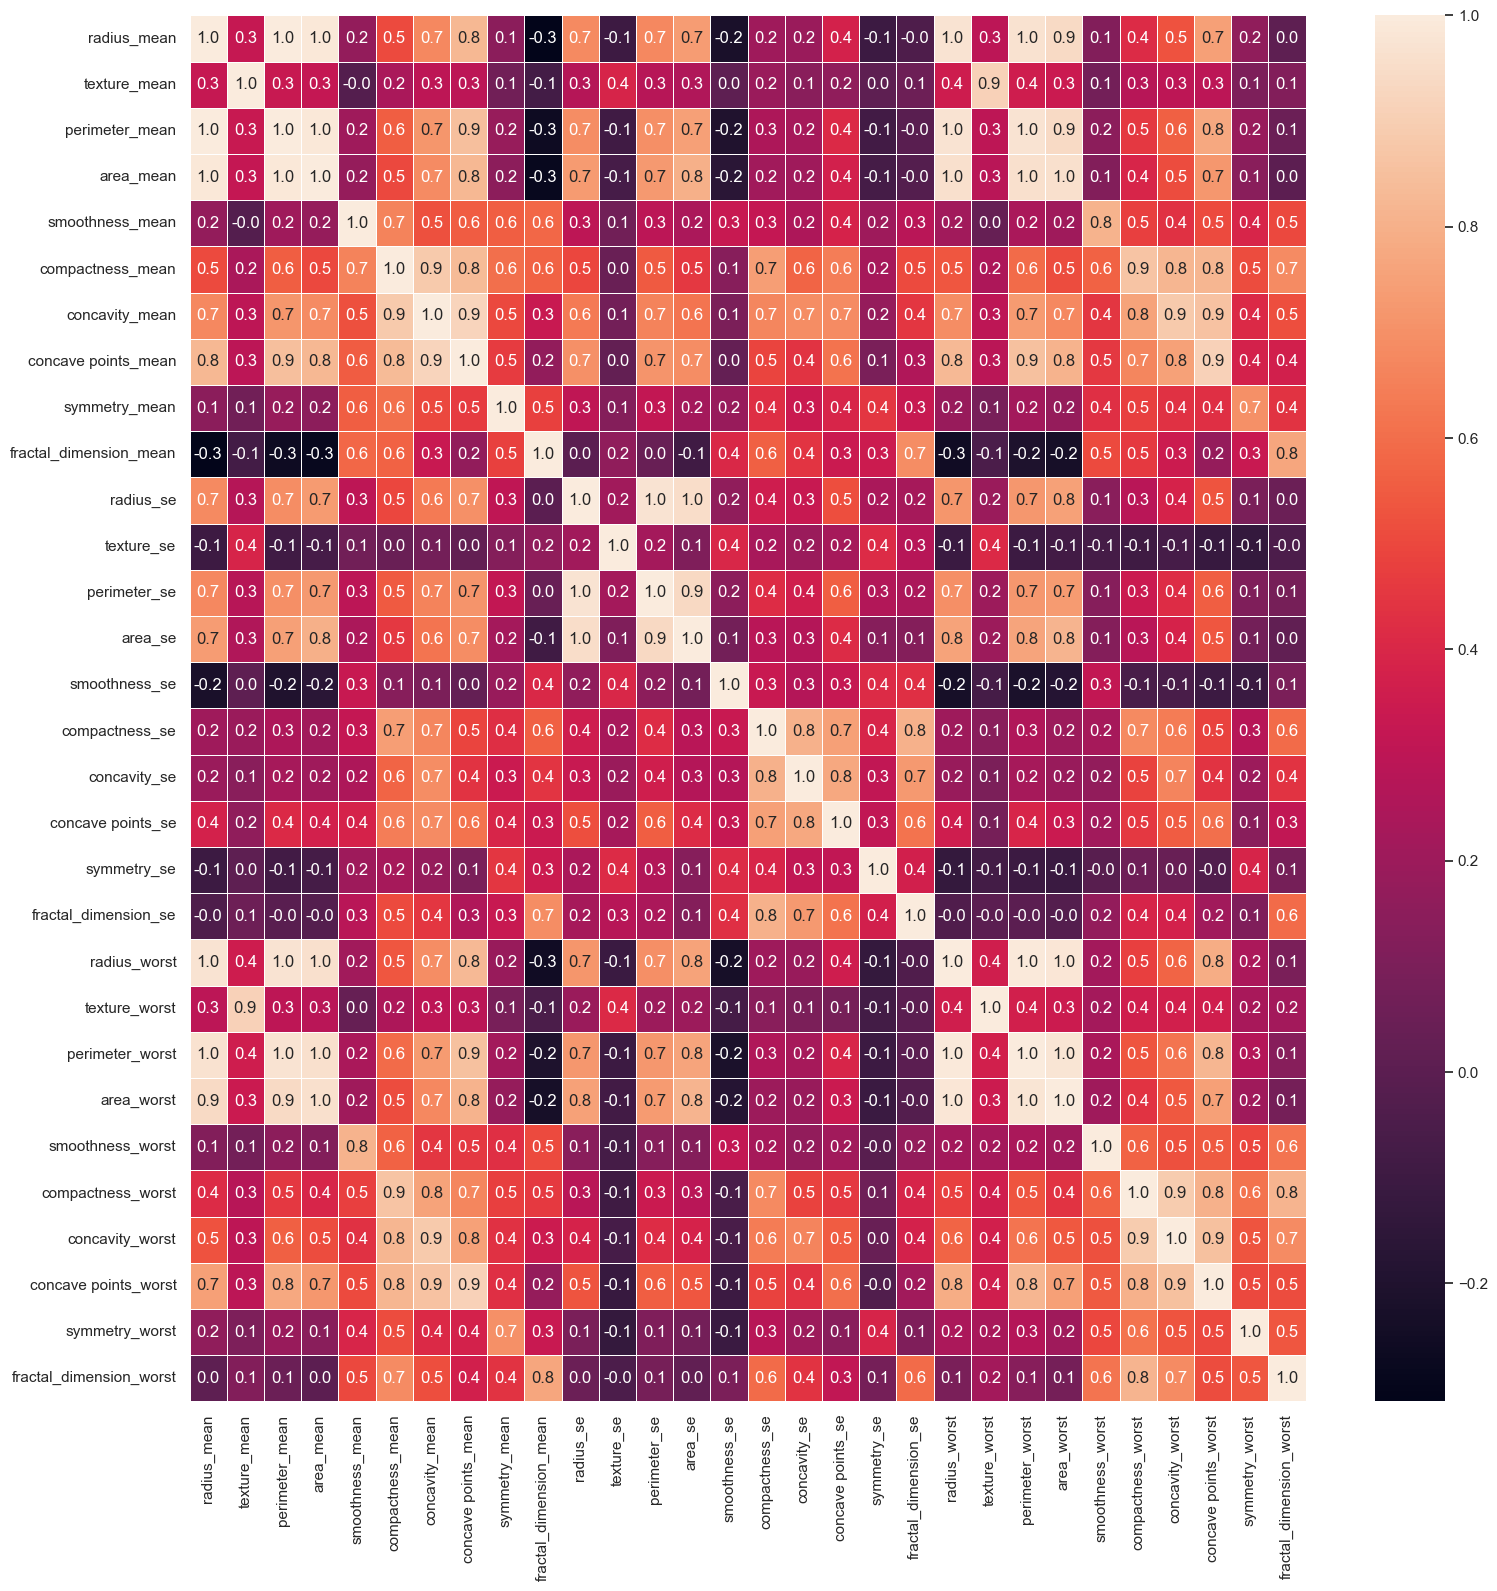

In [43]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<Axes: >

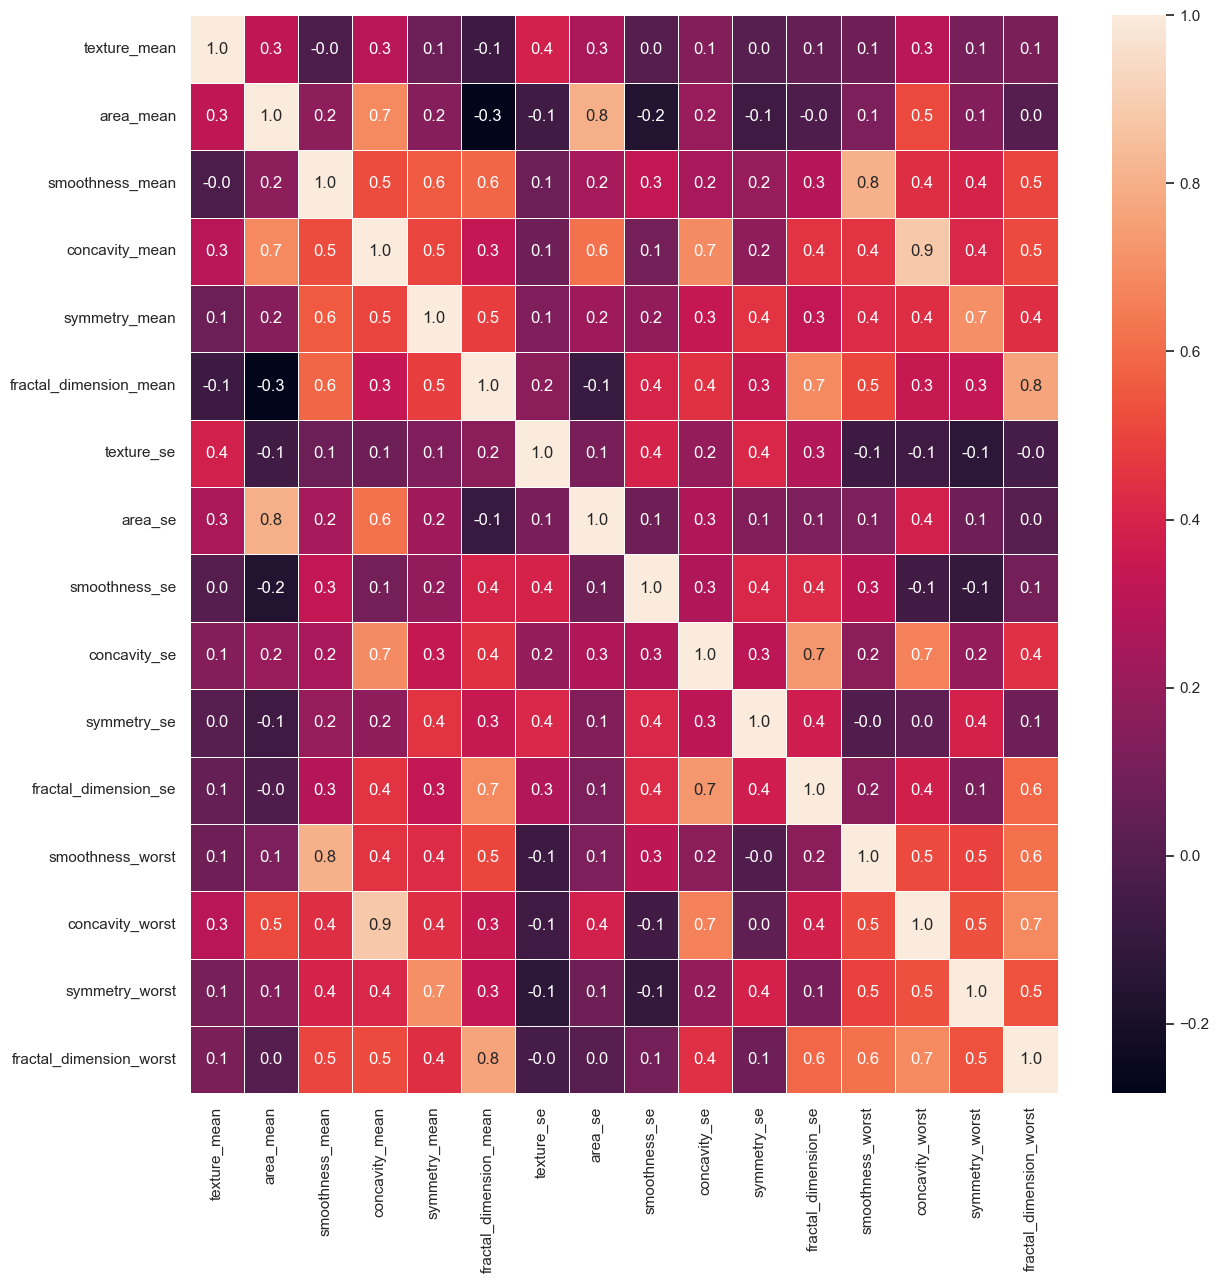

In [44]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 

#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## ⚙️Data Preparation

In [45]:
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data split and scaled successfully!")

✅ Data split and scaled successfully!


## 🤖Model Training

In [46]:
model = LogisticRegression(solver= 'liblinear', max_iter= 1000)

model.fit(X_train_scaled, y_train)
print("✅ Logistic Regression model trained sucessfully!")

✅ Logistic Regression model trained sucessfully!


## 📈Model Evaluation

In [47]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Metrics
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


🎯 Accuracy: 97.37%

Classification Report:

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



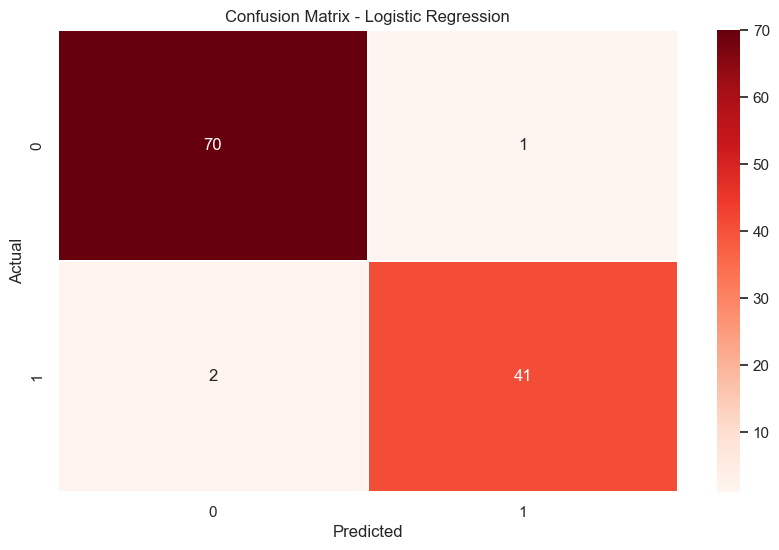

In [48]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', linewidths=0.3)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 🌿Feature Importance

In [49]:
# Extract coefficients and create DataFrame
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
feature_importance.head(10)


,Feature,Importance
21,texture_worst,1.335651
10,radius_se,1.283117
28,symmetry_worst,1.196087
7,concave points_mean,1.130510
13,area_se,0.944861
26,concavity_worst,0.942150
23,area_worst,0.882949
20,radius_worst,0.881042
6,concavity_mean,0.818323
27,concave points_worst,0.766904


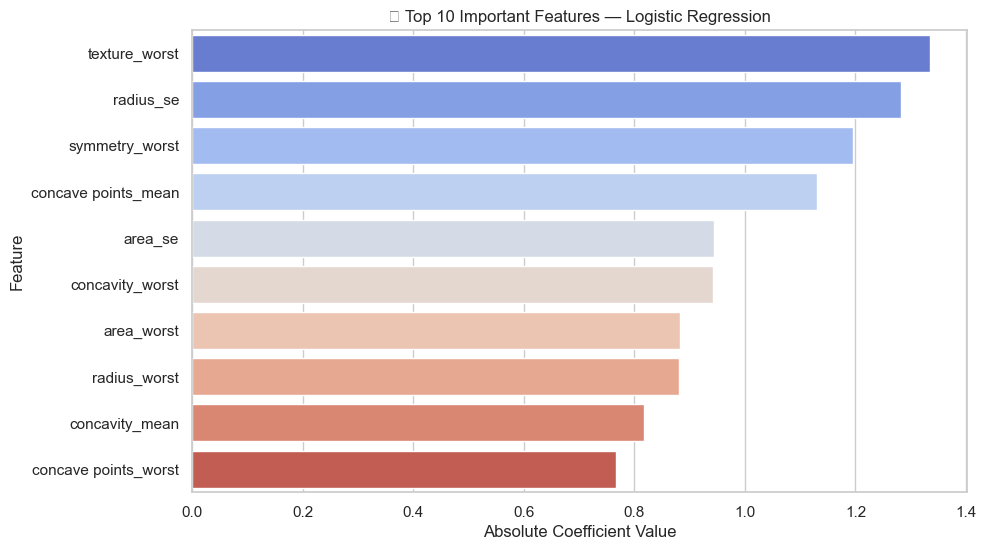

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='coolwarm')
plt.title('🔥 Top 10 Important Features — Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()


## 💾Save Model & Scaler

In [51]:
joblib.dump(model, "breast_cancer_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("💾 Model & Scaler Saved Successfully!")


💾 Model & Scaler Saved Successfully!


## 🧠Test the Prediction Pipeline

In [52]:
# Load saved model
loaded_model = joblib.load("breast_cancer_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Take a random test sample
sample_data = X_test.iloc[0].values.reshape(1, -1)

# Scale and predict
sample_scaled = loaded_scaler.transform(sample_data)
prediction = loaded_model.predict(sample_scaled)

result = "🩸 Malignant (Cancerous)" if prediction[0] == 1 else "💚 Benign (Non-Cancerous)"
print("🧾 Prediction Result:", result)


🧾 Prediction Result: 💚 Benign (Non-Cancerous)


# 🧩 Feature Importance — Logistic Regression

Logistic Regression provides **coefficients** that indicate how each feature affects the prediction:

- 🔺 **Positive Coefficients** → Increase probability of *Malignant (Cancerous)*  
- 🔻 **Negative Coefficients** → Decrease probability of *Malignant (Cancerous)*  
- 📏 **Larger absolute values** → Stronger impact on the final outcome  

This makes Logistic Regression an **interpretable and trustworthy** model — ideal for healthcare and scientific use.


# ✅ Conclusion

- The Logistic Regression model achieved strong performance in classifying tumors as **Malignant** or **Benign**.  
- Key influencing features (like `radius_mean`, `perimeter_mean`, and `area_mean`) were identified as the most significant contributors.  
- This interpretable model is valuable in assisting early cancer detection.

---

### 🚀 Next Steps
1. Integrate this model into a **Streamlit Web App** for live predictions.  
2. Add **hyperparameter tuning** (e.g., GridSearchCV) to improve accuracy.  
3. Include **ROC curve and AUC score** visualizations for deeper model analysis.  
4. Deploy the app on **Streamlit Cloud** for portfolio showcasing.

---

### 👨‍💻 Author
**Akshay Jadiya**  
💼 Machine Learning & Data Science Enthusiast  
📧 akshayjadiya15@gmail.com  
🌐 [GitHub Profile](https://github.com/akshayjadiya01)
